## E5 Advanced geospatial plotting

In [42]:
import pandas as pd
import os
from keplergl import KeplerGl
from pyproj import CRS
import numpy as np
from matplotlib import pyplot as plt

In [43]:
df = pd.read_csv('new_york_data.csv', index_col = 0)

C:\Users\olivi\AppData\Local\Temp\ipykernel_14752\2076588821.py:1: DtypeWarning: Columns (6,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('new_york_data.csv', index_col = 0)


In [44]:
df_half = df.sample(frac=0.2, random_state=42)

In [45]:
df_half.shape

(2400000, 19)

## Data preprocessing

In [46]:
df_half.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'date', 'avgTemp', '_merge', 'value',
       'bike_rides_daily', 'merge_flag'],
      dtype='object')

In [47]:
# Create a value column and group by start and end station 

df_half['value'] = 1
df_group = df_half.groupby(['start_station_name', 'end_station_name'])['value'].count().reset_index()

In [48]:
df_group

,start_station_name,end_station_name,value
0,1 Ave & E 110 St,1 Ave & E 110 St,117
1,1 Ave & E 110 St,1 Ave & E 44 St,1
2,1 Ave & E 110 St,1 Ave & E 62 St,1
3,1 Ave & E 110 St,1 Ave & E 68 St,5
4,1 Ave & E 110 St,1 Ave & E 78 St,7
...,...,...,...
412038,Yankee Ferry Terminal,Soissons Landing,274
412039,Yankee Ferry Terminal,South St & Gouverneur Ln,1
412040,Yankee Ferry Terminal,South St & Whitehall St,2
412041,Yankee Ferry Terminal,West St & Liberty St,1


In [49]:
print(df_group['value'].sum())
print(df_half.shape)

2391701
(2400000, 19)


In [50]:
df_group['value'].describe()

count    412043.000000
mean          5.804494
std          12.853058
min           1.000000
25%           1.000000
50%           2.000000
75%           5.000000
max         919.000000
Name: value, dtype: float64

Some exploratory analysis into the trips

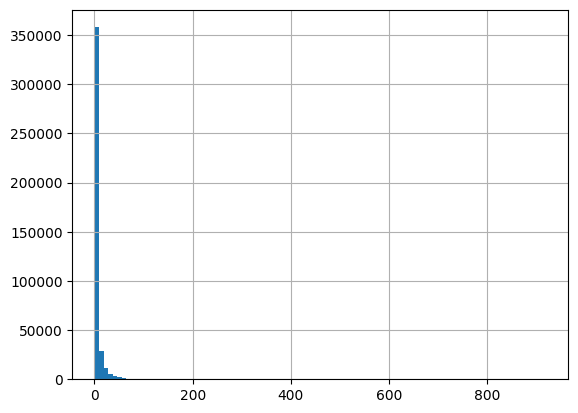

In [51]:
df_group['value'].hist(bins = 100)
plt.show()

[]

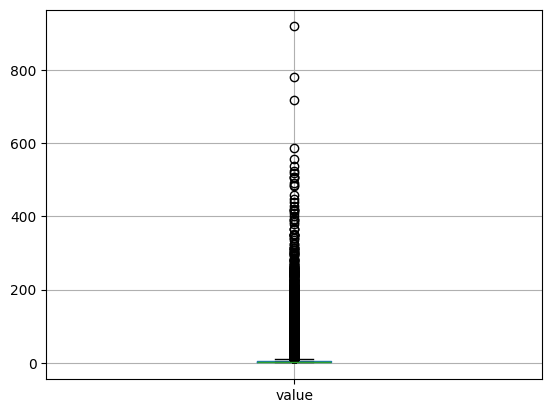

In [52]:
b_plot = df_group.boxplot(column = 'value') 
b_plot.plot()

In [53]:
df_group['value'].sort_index().value_counts()

value
1      170090
2       64510
3       36550
4       24208
5       17419
        ...  
220         1
221         1
208         1
274         1
419         1
Name: count, Length: 310, dtype: int64

In [54]:
df_group.to_csv('df_groupby_final.csv')

In [55]:
df_group.head()

,start_station_name,end_station_name,value
0,1 Ave & E 110 St,1 Ave & E 110 St,117
1,1 Ave & E 110 St,1 Ave & E 44 St,1
2,1 Ave & E 110 St,1 Ave & E 62 St,1
3,1 Ave & E 110 St,1 Ave & E 68 St,5
4,1 Ave & E 110 St,1 Ave & E 78 St,7


In [56]:
df_half.rename(columns = {'value': 'trips'}, inplace = True)

In [57]:
df_group.rename(columns = {'value': 'trips'}, inplace = True)

In [58]:
df_group.columns

Index(['start_station_name', 'end_station_name', 'trips'], dtype='object')

In [59]:
df_half.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,date,avgTemp,_merge,trips,bike_rides_daily,merge_flag
383698,D62F12416207D0F4,classic_bike,2022-01-13 17:31:00.997,2022-01-13 17:49:21.944,Union St & Bedford Ave,3879.04,Central Ave & Melrose St,4832.07,40.669178,-73.955416,40.701120,-73.930390,member,2022-01-13,4.0,both,1,49440.0,both
11839676,CF5CB6BBAD394F00,classic_bike,2022-12-24 14:01:08.869,2022-12-24 14:05:14.865,2 Ave & E 104 St,7436.11,E 93 St & 2 Ave,7286.02,40.789211,-73.943708,40.782454,-73.948920,member,2022-12-24,-11.7,both,1,7331.0,both
401266,8F12410F0C018A87,classic_bike,2022-01-13 12:37:36.663,2022-01-13 12:43:57.937,Park Ave & E 124 St,7682.01,Lenox Ave & W 130 St,7753.13,40.804555,-73.939686,40.810792,-73.943068,member,2022-01-13,4.0,both,1,49440.0,both
7296717,6BBB5C883AF30B39,electric_bike,2022-08-10 17:42:42.604,2022-08-10 17:57:24.887,Water St & Main St,4936.14,Coffey St & Ferris St,4137.14,40.702991,-73.990074,40.678184,-74.017017,member,2022-08-10,27.2,both,1,33992.0,both
10098924,6F994D10EB4878E1,classic_bike,2022-11-03 19:00:29.728,2022-11-03 19:01:56.971,E 132 St & Madison Ave,7748.02,5 Ave & W 131 St,7735.05,40.810224,-73.937195,40.810140,-73.939730,member,2022-11-03,15.7,both,1,49531.0,both


In [60]:
df_stations = df_half[['end_station_name', 'start_station_name', 'trips' , 'start_lat', 'start_lng' , 'end_lat' , 'end_lng']]

In [61]:
df_stations

,end_station_name,start_station_name,trips,start_lat,start_lng,end_lat,end_lng
383698,Central Ave & Melrose St,Union St & Bedford Ave,1,40.669178,-73.955416,40.701120,-73.930390
11839676,E 93 St & 2 Ave,2 Ave & E 104 St,1,40.789211,-73.943708,40.782454,-73.948920
401266,Lenox Ave & W 130 St,Park Ave & E 124 St,1,40.804555,-73.939686,40.810792,-73.943068
7296717,Coffey St & Ferris St,Water St & Main St,1,40.702991,-73.990074,40.678184,-74.017017
10098924,5 Ave & W 131 St,E 132 St & Madison Ave,1,40.810224,-73.937195,40.810140,-73.939730
...,...,...,...,...,...,...,...
4101160,W 25 St & 6 Ave,W 39 St & 9 Ave,1,40.756458,-73.993722,40.743954,-73.991449
3223299,E 51 St & 2 Ave,1 Ave & E 78 St,1,40.771404,-73.953517,40.755293,-73.967641
7705018,Bergen St & Flatbush Ave,Bergen St & Smith St,1,40.686744,-73.990632,40.680945,-73.975673
373297,W 13 St & 5 Ave,E 14 St & Avenue B,1,40.729387,-73.977724,40.735445,-73.994310


In [62]:
df_final = df_stations.rename(columns={
    'start_lat': 'Latitude_x',
    'end_lng': 'Longitude_y',
    'end_lat': 'Latitude_y',
    'start_lng': 'Longitude_x'  # Fixed this — you had 'Longitude_y' twice!
})

In [63]:
import gc # this is garbage collector - speeds up performance
gc.collect()

12397

In [64]:
df_final.head()

,end_station_name,start_station_name,trips,Latitude_x,Longitude_x,Latitude_y,Longitude_y
383698,Central Ave & Melrose St,Union St & Bedford Ave,1,40.669178,-73.955416,40.701120,-73.930390
11839676,E 93 St & 2 Ave,2 Ave & E 104 St,1,40.789211,-73.943708,40.782454,-73.948920
401266,Lenox Ave & W 130 St,Park Ave & E 124 St,1,40.804555,-73.939686,40.810792,-73.943068
7296717,Coffey St & Ferris St,Water St & Main St,1,40.702991,-73.990074,40.678184,-74.017017
10098924,5 Ave & W 131 St,E 132 St & Madison Ave,1,40.810224,-73.937195,40.810140,-73.939730


In [65]:
df_final.rename(columns = {'Latitude_x' : 'start_lat', 'Longitude_x' : 'start_lon', 
       'Latitude_y' : 'end_lat', 'Longitude_y' : 'end_lon',}, inplace = True)

## Plot the map

In [66]:
df_final.to_csv('df_final_locations_for_map.csv')

In [67]:
print(df_final.isna().sum())  # Shows NaN counts per column
print(df_final[df_final.isna().any(axis=1)])  # Shows rows with NaNs

end_station_name      8299
start_station_name      10
trips                    0
start_lat                0
start_lon                0
end_lat               4523
end_lon               4523
dtype: int64
         end_station_name         start_station_name  trips  start_lat  \
55777                 NaN         E 17 St & Broadway      1  40.737050   
11211752              NaN   Murray St & Greenwich St      1  40.714826   
8144011               NaN    DeKalb Ave & Hudson Ave      1  40.689888   
159033                NaN  Bushwick Ave & Forrest St      1  40.700760   
8750975               NaN            W 26 St & 8 Ave      1  40.747348   
...                   ...                        ...    ...        ...   
753013                NaN    Menahan St & Seneca Ave      1  40.704610   
9110053               NaN            1 Ave & E 44 St      1  40.749748   
11841511              NaN            E 48 St & 5 Ave      1  40.757398   
9506962               NaN           W 26 St & 10 Ave      

In [68]:
df_final.dropna(inplace=True)

In [69]:
df_final.columns

Index(['end_station_name', 'start_station_name', 'trips', 'start_lat',
       'start_lon', 'end_lat', 'end_lon'],
      dtype='object')

In [70]:
df_sample = df_final.iloc[::60].copy()

In [71]:
# Create KeplerGl instance

m = KeplerGl(height = 700, data={"data_1": df_sample})
m

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


KeplerGl(data={'data_1':                     end_station_name         start_station_name  trips  \
383698     …

To enhance the clarity and visual impact of the map, I adjusted both the color of the points and added arc layers to show connections between pickup and drop-off locations. I chose a blue-to-purple color palette for the points to make them stand out clearly against the default map background, and a contrasting orange tone for the arcs to emphasize the direction and frequency of trips.

These color adjustments weren’t just for aesthetics—they significantly improve legibility, especially in dense areas like Manhattan, where overlapping points and lines can easily become difficult to distinguish. The edited color scheme helps viewers more quickly identify high-volume trip zones and understand the flow of traffic across the city.

After applying a filter to the map to focus on the most common trips in New York City, it quickly became clear that Manhattan stood out as the busiest zone. The density of trips in and around Manhattan was significantly higher compared to other boroughs. This isn’t too surprising, considering Manhattan is the city’s economic and cultural hub, home to major business districts like Midtown and the Financial District, world-famous landmarks, and a high population density during work hours.

Additional research supports this: Manhattan attracts millions of commuters and tourists daily, making it a hotspot for taxi and ride-sharing activity. Areas like Times Square, Central Park, and Grand Central Terminal naturally generate heavy traffic due to their popularity and central location. The combination of tourism, business travel, and limited parking availability likely contributes to the high volume of trips in this area.

In [77]:
config = m.config

In [78]:
config

{'version': 'v1',
 'config': {'visState': {'filters': [{'dataId': ['data_1'],
     'id': 'xaz033yfj',
     'name': ['trips'],
     'type': 'range',
     'value': [1, 11],
     'plotType': 'histogram',
     'animationWindow': 'free',
     'yAxis': None,
     'view': 'side',
     'speed': 1,
     'enabled': True}],
   'layers': [{'id': 'u2zyath',
     'type': 'point',
     'config': {'dataId': 'data_1',
      'label': 'start',
      'color': [134, 10, 90],
      'highlightColor': [252, 242, 26, 255],
      'columns': {'lat': 'start_lat', 'lng': 'start_lon'},
      'isVisible': True,
      'visConfig': {'radius': 10,
       'fixedRadius': False,
       'opacity': 0.8,
       'outline': False,
       'thickness': 2,
       'strokeColor': None,
       'colorRange': {'name': 'Global Warming',
        'type': 'sequential',
        'category': 'Uber',
        'colors': ['#5A1846',
         '#900C3F',
         '#C70039',
         '#E3611C',
         '#F1920E',
         '#FFC300']},
       'stro

In [79]:
import json
with open("config.json", "w") as outfile:
    json.dump(config, outfile)

In [80]:
m.save_to_html(file_name = 'New York Bike Trips Aggregated.html', read_only = False, config = config)

Map saved to New York Bike Trips Aggregated.html!


In [76]:
df_half.to_csv('new_york_data_1.csv')